 __1) PROBLEM STATEMENT__ : Understanding how student's performance (tests scores) is affected by other variables such as
   Gender , Ethnicity , Parental level of education, Lunch and Test preparation course. 

 __2) DATA COLLECTION__ : 
* Data source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* Data consists of 8 columns and 1000 rows. 

Importing all required packages 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

Importing the csv file data as Pandas Dataframe

In [5]:
df = pd.read_csv('C:/Users/kavit/OneDrive/Desktop/ml_projects/notebook/StudentsPerformance.csv')

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset 

In [7]:
df.shape

(1000, 8)

__DATASET INFORMATION__

* Gender : sex of students      =   Male / Female
* Race / Ethinicity of students =   Group (A / B / C / D / E )
* Parental level of education   =   Bachelor's degree / Some college / Master's                                      degree / Associate's degree / High school
* Lunch                         =   Has lunch before test (standard / free / Reduced)
* Test preparation course       =   Complete / Not Complete before test 
* Math score
* Reading score
* Writing score 

__3.) DATA CHECKS TO PERFORM__
* Check Missing values
* Check Duplicates
* Check Data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in different categorical column

__Checking missing values__

In [8]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values or nan values in any of the columns

__Checking for Duplicates__

In [9]:
df.duplicated().sum()

0

There are no duplicates values in the dataset

__Checking data types in the dataset__

In [10]:
# Check null and Dtypes 
df.info()

# there are int and object datatypes and no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


__Checking the number of unique values in each column__

In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

__Checking statistics of data set__

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


INSIGHTS GAINED FROM ABOVE DESCRIPTION : 

* From above description of numerical data, all means are very close to each other between 66 to 68.05
* All standard deviations are also close to between 14.6 and 15.19
* Minimum and Maximum scores or values of each subjects are also seen 

__Exploring data__

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
print("Categories in 'gender' variable : ", end= " ")
print(df['gender'].unique())
print('-----------------------------------------------------')
print("Categories in 'race/ethinity' variable :", end= " ")
print(df['race/ethnicity'].unique())
print('-----------------------------------------------------')
print("Categories in 'Parental level of education' variable :", end= " ")
print(df['parental level of education'].unique())
print('-----------------------------------------------------')
print("Categories in 'lunch' variable :", end= " ")
print(df['lunch'].unique())
print('-----------------------------------------------------')
print("Categories in 'test preparation course' variable :", end= " ")
print(df['test preparation course'].unique())


Categories in 'gender' variable :  ['female' 'male']
-----------------------------------------------------
Categories in 'race/ethinity' variable : ['group B' 'group C' 'group A' 'group D' 'group E']
-----------------------------------------------------
Categories in 'Parental level of education' variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
-----------------------------------------------------
Categories in 'lunch' variable : ['standard' 'free/reduced']
-----------------------------------------------------
Categories in 'test preparation course' variable : ['none' 'completed']


__Checking or classifying numerical and categorical attributes__

In [15]:
numerical_features = [feature for feature in df.columns if df[feature].dtype !='O' ]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} number of Numerical features : {}".format(len(numerical_features), numerical_features ))
print("\nWe have {} number of catergorical features : {}".format(len(categorical_features), categorical_features))

We have 3 number of Numerical features : ['math score', 'reading score', 'writing score']

We have 5 number of catergorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [16]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


__Adding columns for "Total Score" and "Average Score"__

In [17]:
df['Total score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average'] = df['Total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
math_centum = df[df['math score'] == 100]['Average'].count()
writing_centum = df[df['writing score'] == 100]['Average'].count()
reading_centum  = df[df['reading score'] == 100]['Average'].count()


print("Number of students centum in reading are : {}".format(reading_centum))
print("Number of students centum in writing are : {}".format(writing_centum))
print("Number of students centum in math are : {}".format(math_centum))

Number of students centum in reading are : 17
Number of students centum in writing are : 14
Number of students centum in math are : 7


In [19]:
math_less_than_20 = df[df['math score'] < 20]['Average'].count()
writing_less_than_20 = df[df['writing score'] <20]['Average'].count()
reading_less_than_20  = df[df['reading score'] <20]['Average'].count()


print("Number of students less than 20 marks in reading are : {}".format(reading_less_than_20))
print("Number of students less than 20 marks in writing are : {}".format(writing_less_than_20))
print("Number of students less than 20 marks in math are : {}".format(math_less_than_20))

Number of students less than 20 marks in reading are : 1
Number of students less than 20 marks in writing are : 3
Number of students less than 20 marks in math are : 4


Insights : 
* Best performance in reading
* Maths performance is bad as the there are many people who scored less than 20 and a few centums only
* Writing performance is good (i.e.) better than maths but not as best as reading

__4. EXPLORING DATA__

__Visualizing average score distribution get more insights__

* Histogram
* Kernel Distribution Function (KDE)

__Histogram & KDE__

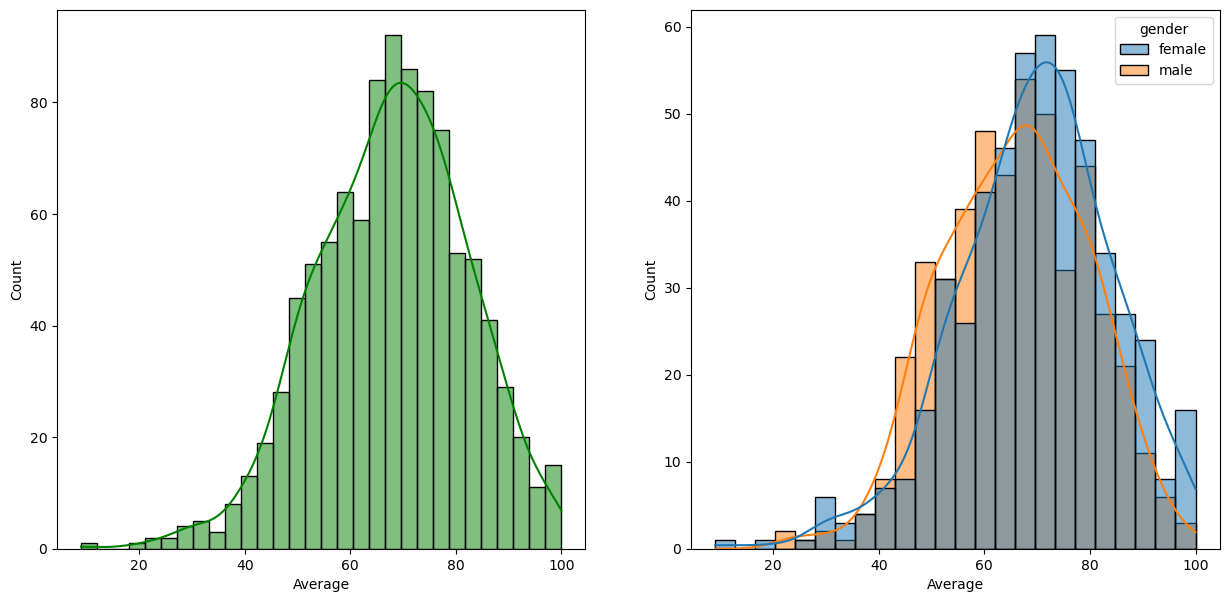

In [20]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'Average', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'Average', kde = True, hue = 'gender')
plt.show()


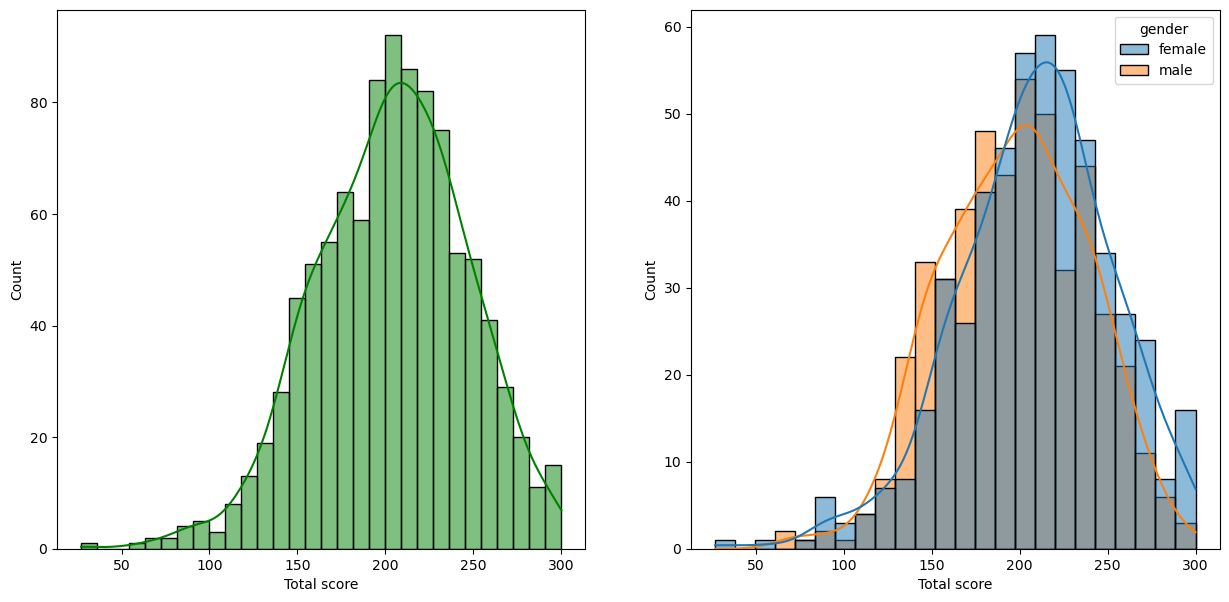

In [21]:
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x = 'Total score', bins = 30, kde= True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'Total score', kde = True, hue = 'gender')
plt.show()

Female students perform better than male students 

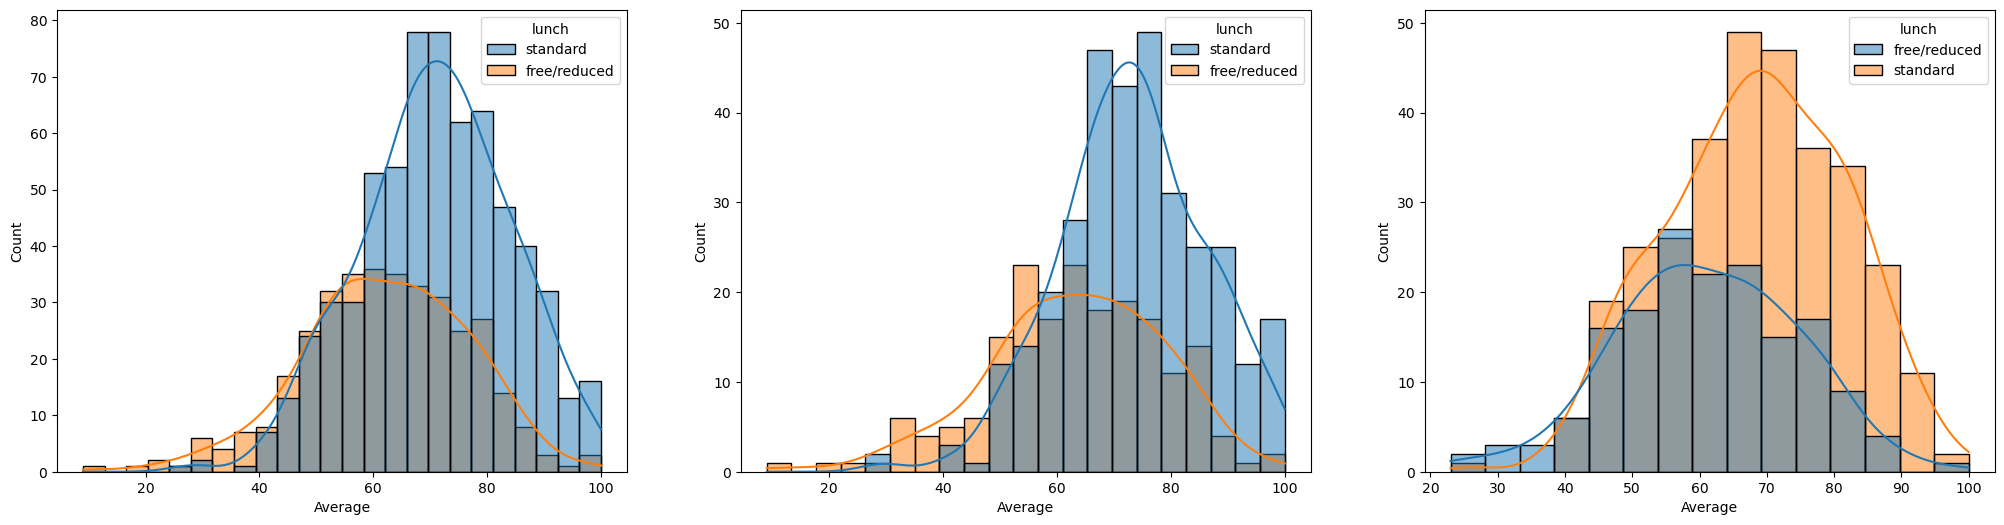

In [22]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df, x = 'Average', kde = True, hue = 'lunch')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'], x = 'Average', kde = True, hue = 'lunch')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'], x = 'Average', kde = True, hue = 'lunch')
plt.show()

INSIGHTS : 
* Performace in general of the entire class, is good and high when they have standard lunch before the test
* For girls abd boys - Performance is better when they have standard lunch

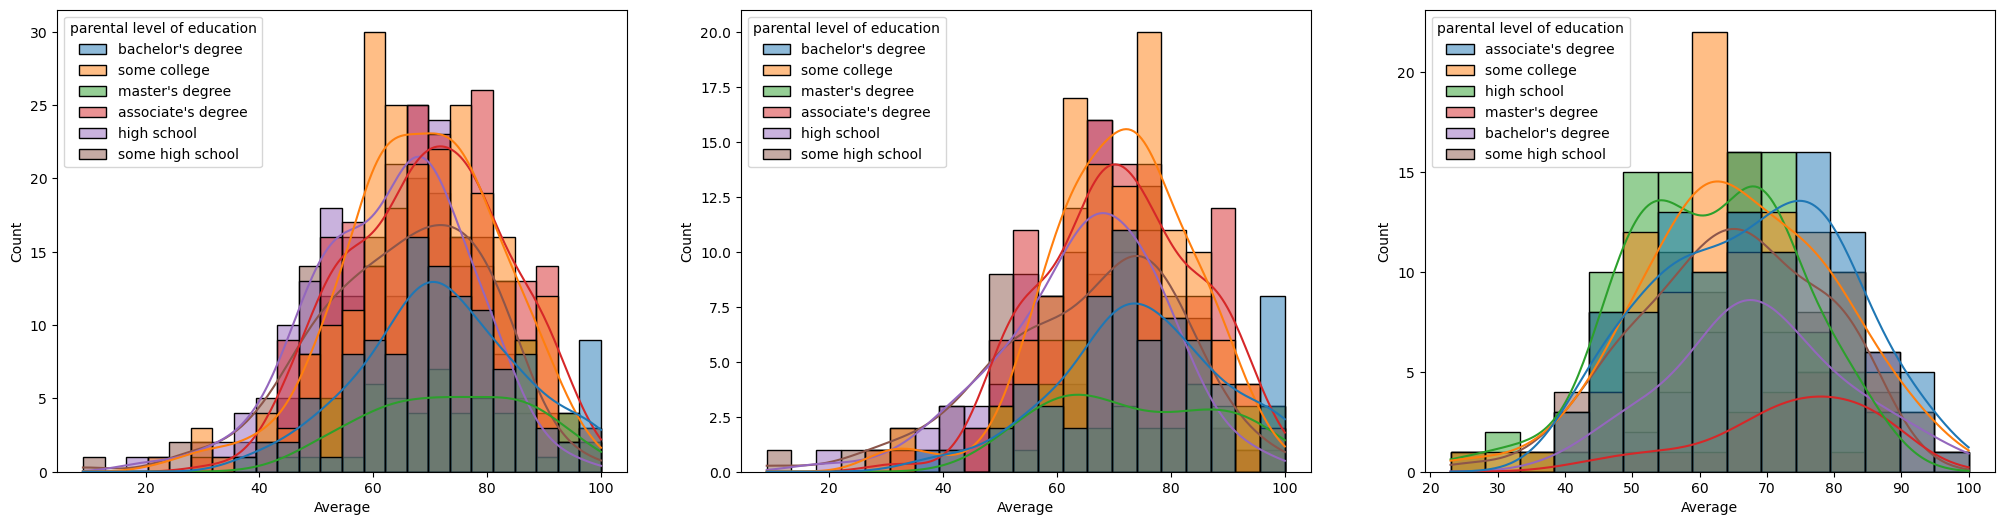

In [23]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df, x = 'Average', kde = True, hue = 'parental level of education')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'], x = 'Average', kde = True, hue = 'parental level of education')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'], x = 'Average', kde = True, hue = 'parental level of education')
plt.show()

INSIGHTS : 
| Parental Education           | Score Tendency                |
| ---------------------------- | ----------------------------- |
| Master's/Bachelor's          | Higher scores, right-shifted  |
| Associate's/Some College     | Moderate scores, wider spread |
| High School/Some High School | Lower scores, left-shifted    |

But still there is no standard insights related to parent's education influencing student's score

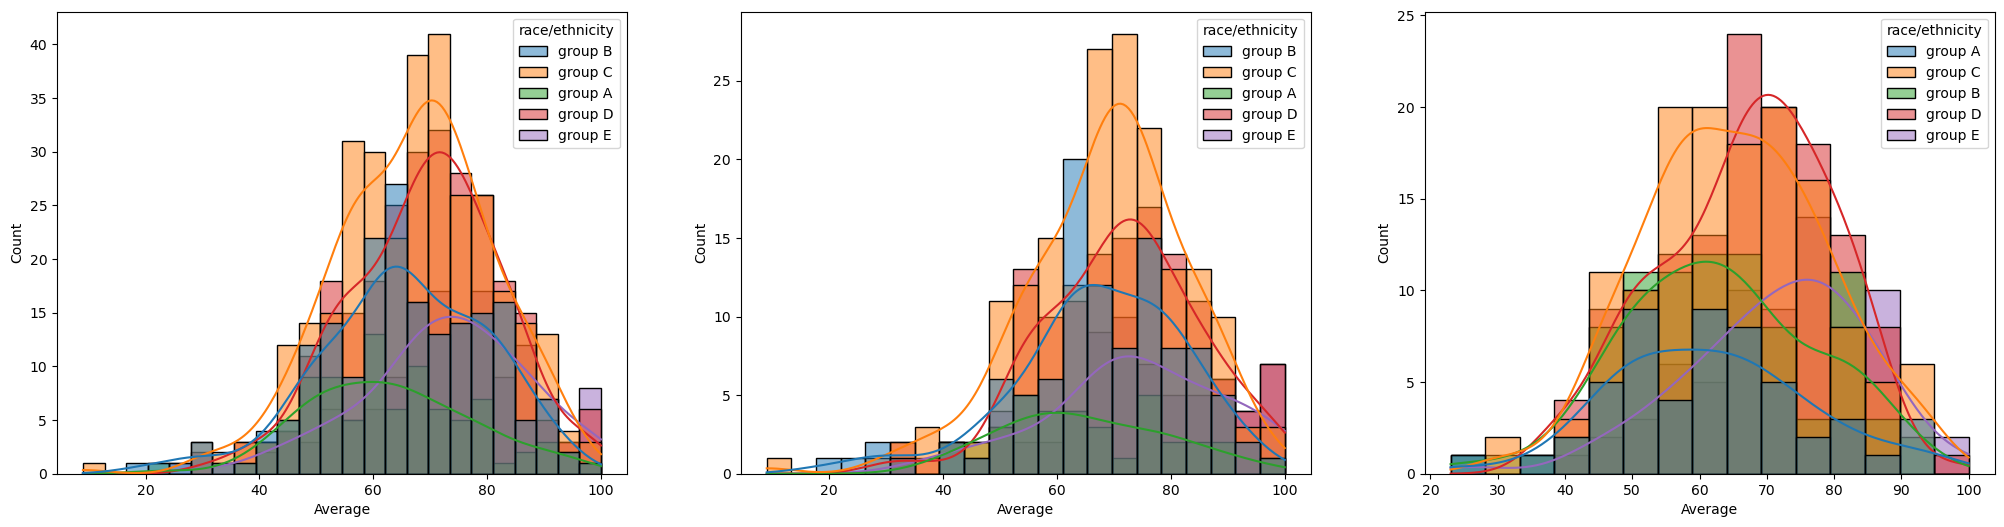

In [24]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df, x = 'Average', kde = True, hue = 'race/ethnicity')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'], x = 'Average', kde = True, hue = 'race/ethnicity')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'], x = 'Average', kde = True, hue = 'race/ethnicity')
plt.show()

INSIGHTS : 
* Group C and Group D students perform better than other groups irrespective of gender
* Group A and Group B students perform poorly as their average is less and many are there in that range.

__MAXIMUM SCORE OF STUDENTS IN ALL THREE SUBJECTS__

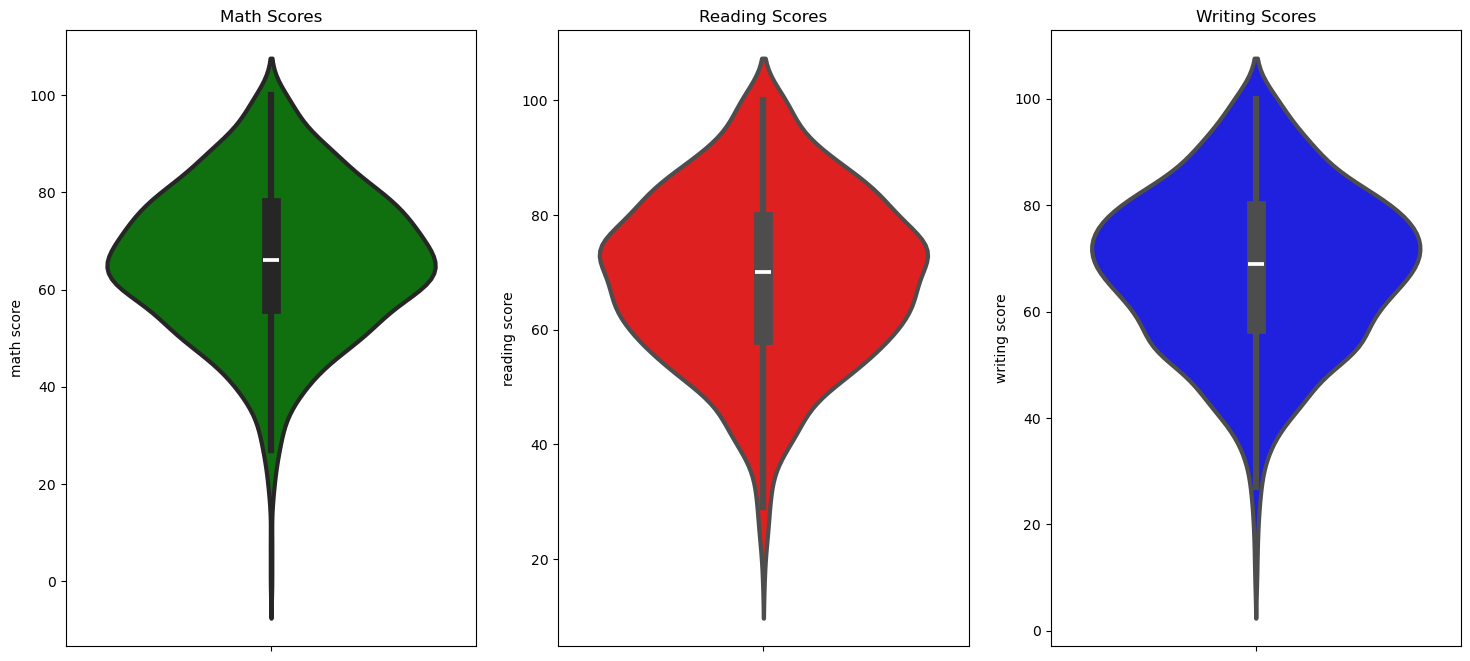

In [25]:
plt.figure(figsize = (18,8))
plt.subplot(1,3,1)
plt.title('Math Scores')
sns.violinplot(y='math score', data = df, color = 'green', linewidth = 3)
plt.subplot(1,3,2)
plt.title('Reading Scores')
sns.violinplot(y='reading score', data = df, color = 'red', linewidth = 3)
plt.subplot(1,3,3)
plt.title('Writing Scores')
sns.violinplot(y='writing score', data = df, color = 'blue', linewidth = 3)
plt.show()

INSIGHT : 
* Majority of Score in Math between 60 - 80
* Majority of Score in Reading between 60 - 80
* Majority of Score in Writing between 60 - 80

__MULLTIVARIATE ANALYSIS USING PIE PLOT__

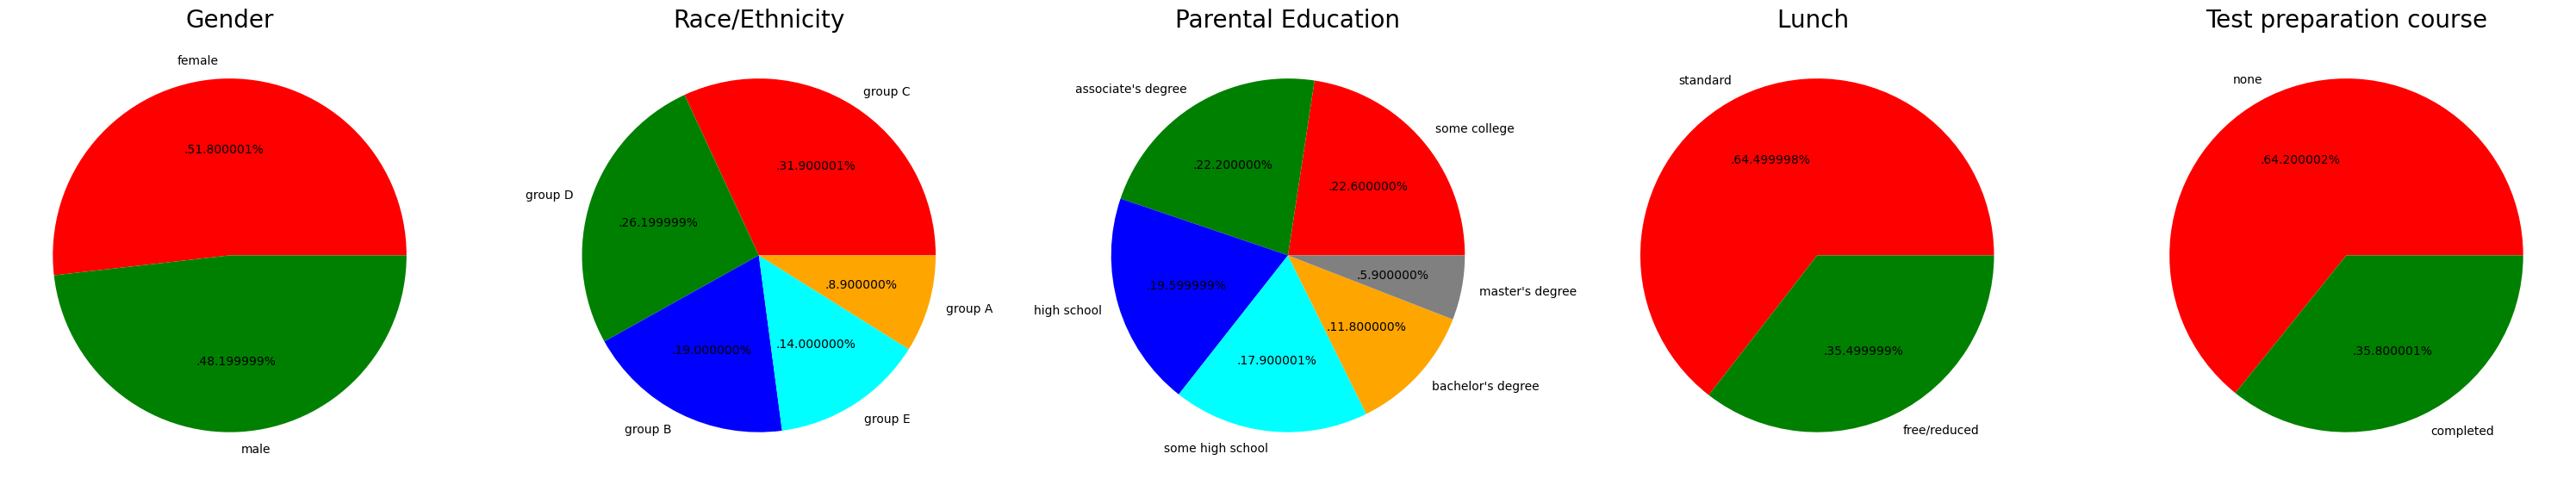

In [26]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(151)
size = df['gender'].value_counts()
labels = size.index
color = ['red', 'green']
plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(152)
size = df['race/ethnicity'].value_counts()
labels = size.index
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(153)
size = df['parental level of education'].value_counts()
labels = size.index
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size, colors = color,labels = labels, autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.subplot(154)
size = df['lunch'].value_counts()
labels = size.index
color = ['red', 'green']
plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Lunch ', fontsize = 20)
plt.axis('off')

plt.subplot(155)
size = df['test preparation course'].value_counts()
labels = size.index
color = ['red', 'green']
plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Test preparation course', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()
plt.show()

__UNIVARIATE ANALYSIS__

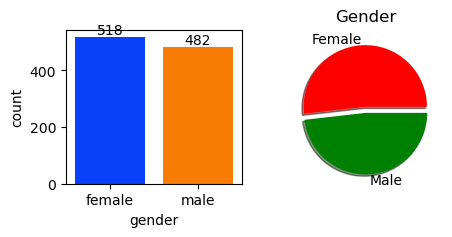

In [27]:
f,ax = plt.subplots(1,2,figsize = (5,2))
sns.countplot(x = df['gender'], data = df, palette = 'bright', ax = ax[0], saturation = 0.95)

for container in ax[0].containers : 
    ax[0].bar_label(container, color = 'black', size = 10)

plt.pie( x = df['gender'].value_counts(), labels = ['Female', 'Male'], explode = [0,0.1], shadow = True, colors = ['red', 'green'])
plt.title("Gender")
plt.show()    

__BIVARIATE ANLAYSIS__

We will check whether gender has any impact in the performance of the students

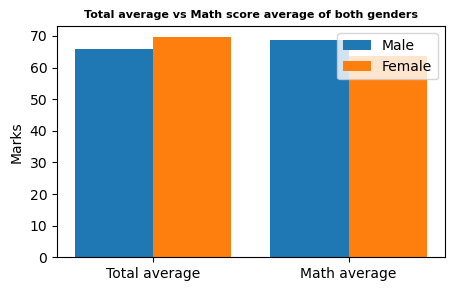

In [28]:
gender_group = df.groupby('gender').mean(numeric_only = True)
gender_group

plt.figure(figsize = (5,3))

X = ['Total average', 'Math average']

female_scores = [gender_group.loc['female','Average'], gender_group.loc['female','math score']]
male_scores = [gender_group.loc['male','Average'], gender_group.loc['male','math score']]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel('Marks')
plt.title('Total average vs Math score average of both genders', fontsize = 8, fontweight = 'bold')
plt.legend()
plt.show()

INSIGHTS : 
* Females have a better total score than males
* Male have a better math score than female

Does Race / Ethnicity have any impact on student performance ?

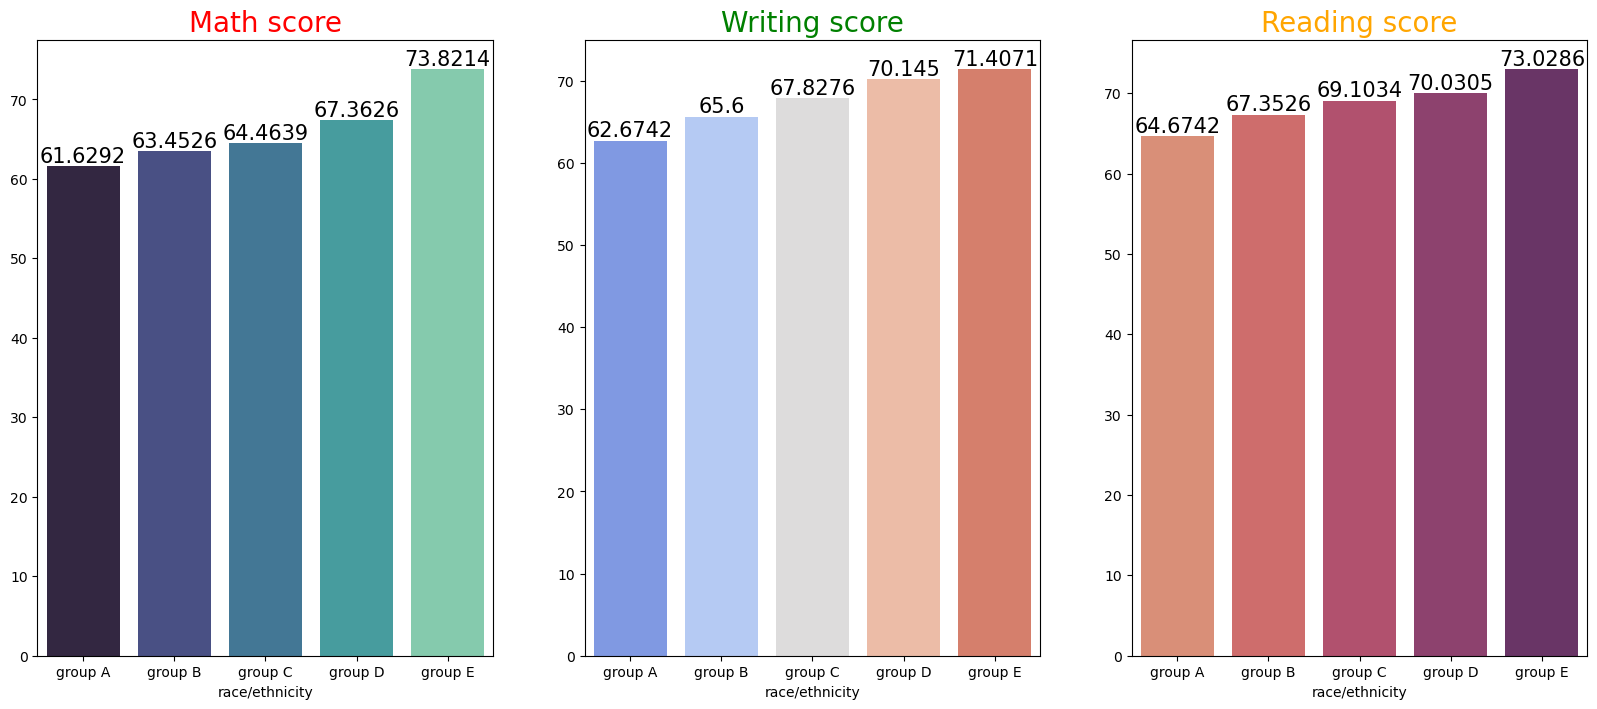

In [29]:
race_ethnicity = df.groupby('race/ethnicity')
f,ax = plt.subplots(1,3,figsize = (20,8))

sns.barplot(x = race_ethnicity['math score'].mean().index, y = race_ethnicity['math score'].mean().values, palette = 'mako', ax = ax[0])
ax[0].set_title('Math score', color = 'red', size = 20)
for container in ax[0].containers :
    ax[0].bar_label(container, color = 'black', size = 15)

sns.barplot(x = race_ethnicity['writing score'].mean().index, y = race_ethnicity['writing score'].mean().values, palette = 'coolwarm', ax = ax[1])
ax[1].set_title('Writing score', color = 'green', size = 20)
for container in ax[1].containers :
    ax[1].bar_label(container, color = 'black', size = 15)

sns.barplot(x = race_ethnicity['reading score'].mean().index, y = race_ethnicity['reading score'].mean().values, palette = 'flare', ax = ax[2])
ax[2].set_title('Reading score', color = 'orange', size = 20)
for container in ax[2].containers :
    ax[2].bar_label(container, color = 'black', size = 15)

INSIGHTS :
* Group E scored the highest marks
* Group A scored the lowest marks

Does parent's education affect student's performance ?

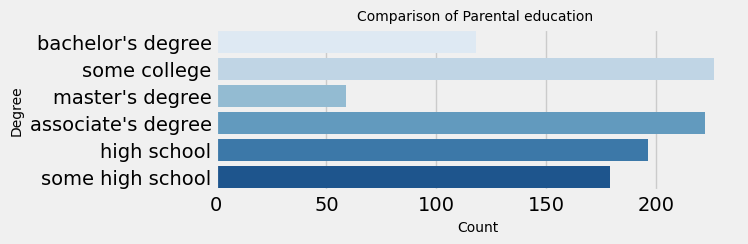

In [30]:
plt.rcParams['figure.figsize'] = (6,2)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental education ', fontweight = 7, fontsize = 10)
plt.xlabel('Count', fontsize = 10)
plt.ylabel('Degree', fontsize= 10)
plt.show()


INSIGHTS : 
* Students whose parents education is from some college / Associate's degree as high
* Parents having master's degree are less
  

Does the above affect student's perfomance ?

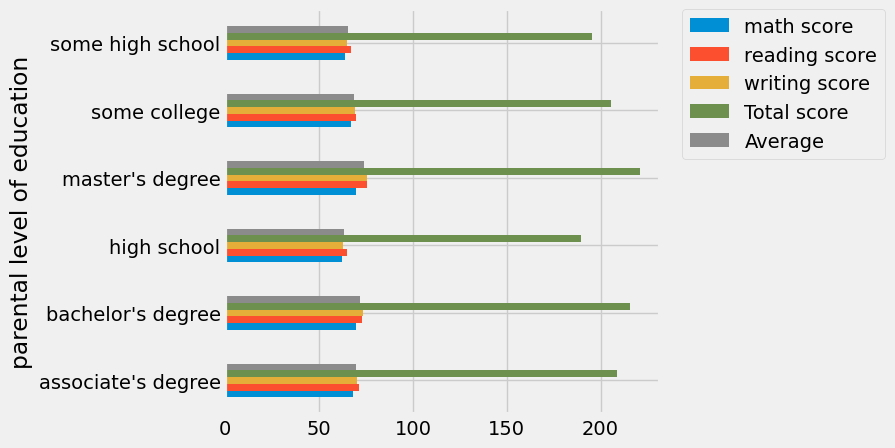

In [31]:
df.groupby('parental level of education').mean(numeric_only = True).plot(kind = 'barh', figsize = (5,5))
plt.legend(bbox_to_anchor = (1.05, 1), loc =2, borderaxespad = 0.)
plt.show()

INSIGHTS : 
* Students whose parents have master's degree and bachelor's degree have high total score


* Which type of lunch is most common among students ?
* Also Does the lunch type affect performance ?

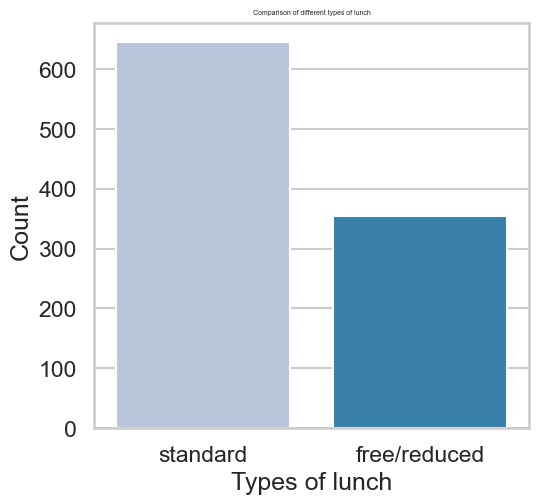

In [32]:
plt.rcParams['figure.figsize'] = (5,5)
sns.set_theme(style='whitegrid', context='talk')

sns.countplot(x = 'lunch', data = df, palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 5)
plt.xlabel('Types of lunch')
plt.ylabel('Count')
plt.show()

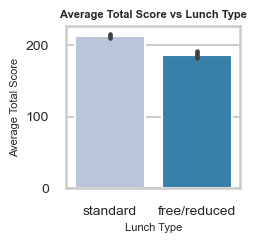

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
sns.barplot(x='lunch', y='Total score', data=df, palette='PuBu', estimator='mean')
plt.title('Average Total Score vs Lunch Type', fontsize=8, fontweight='bold')
plt.xlabel('Lunch Type', fontsize = 8)
plt.ylabel('Average Total Score', fontsize = 8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


INSIGHTS :
* Standard lunch consuming students have better score than free/ reduced.

<Axes: xlabel='lunch', ylabel='writing score'>

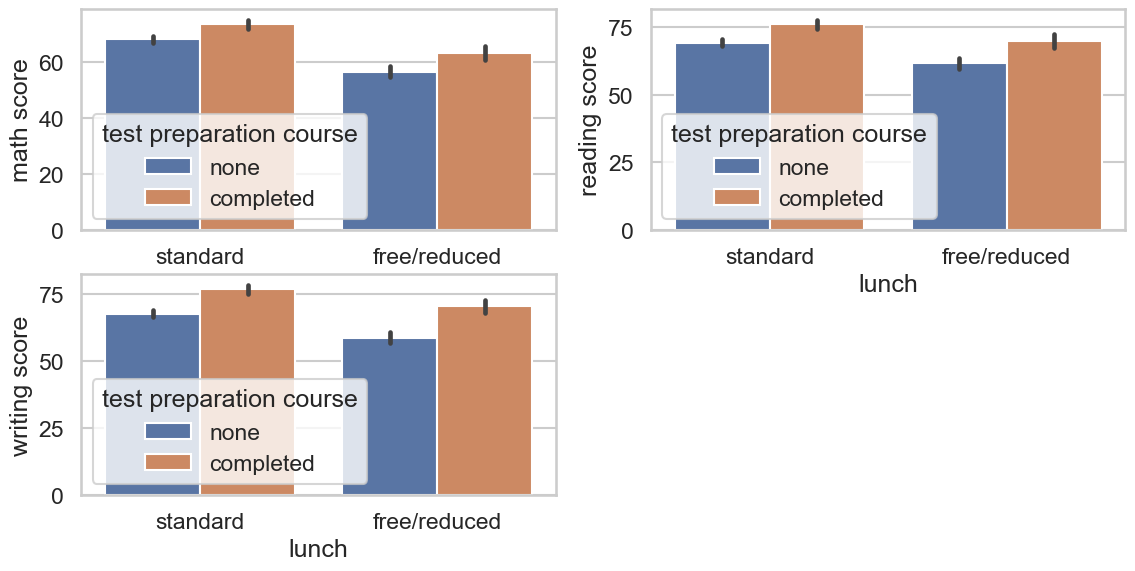

In [34]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

__Checking outliers__


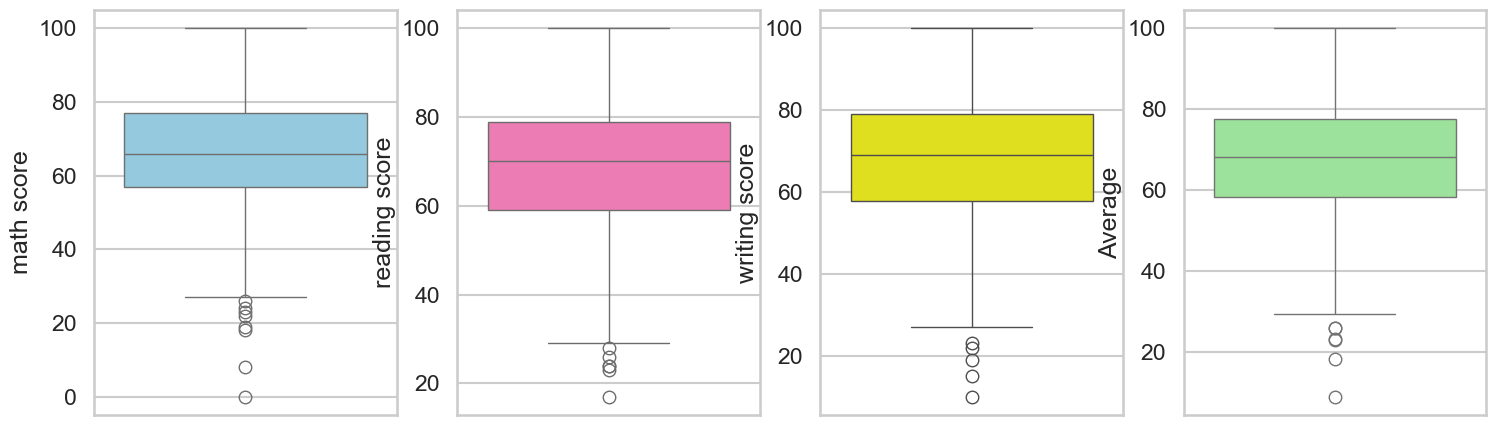

In [35]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

__Pair plot__

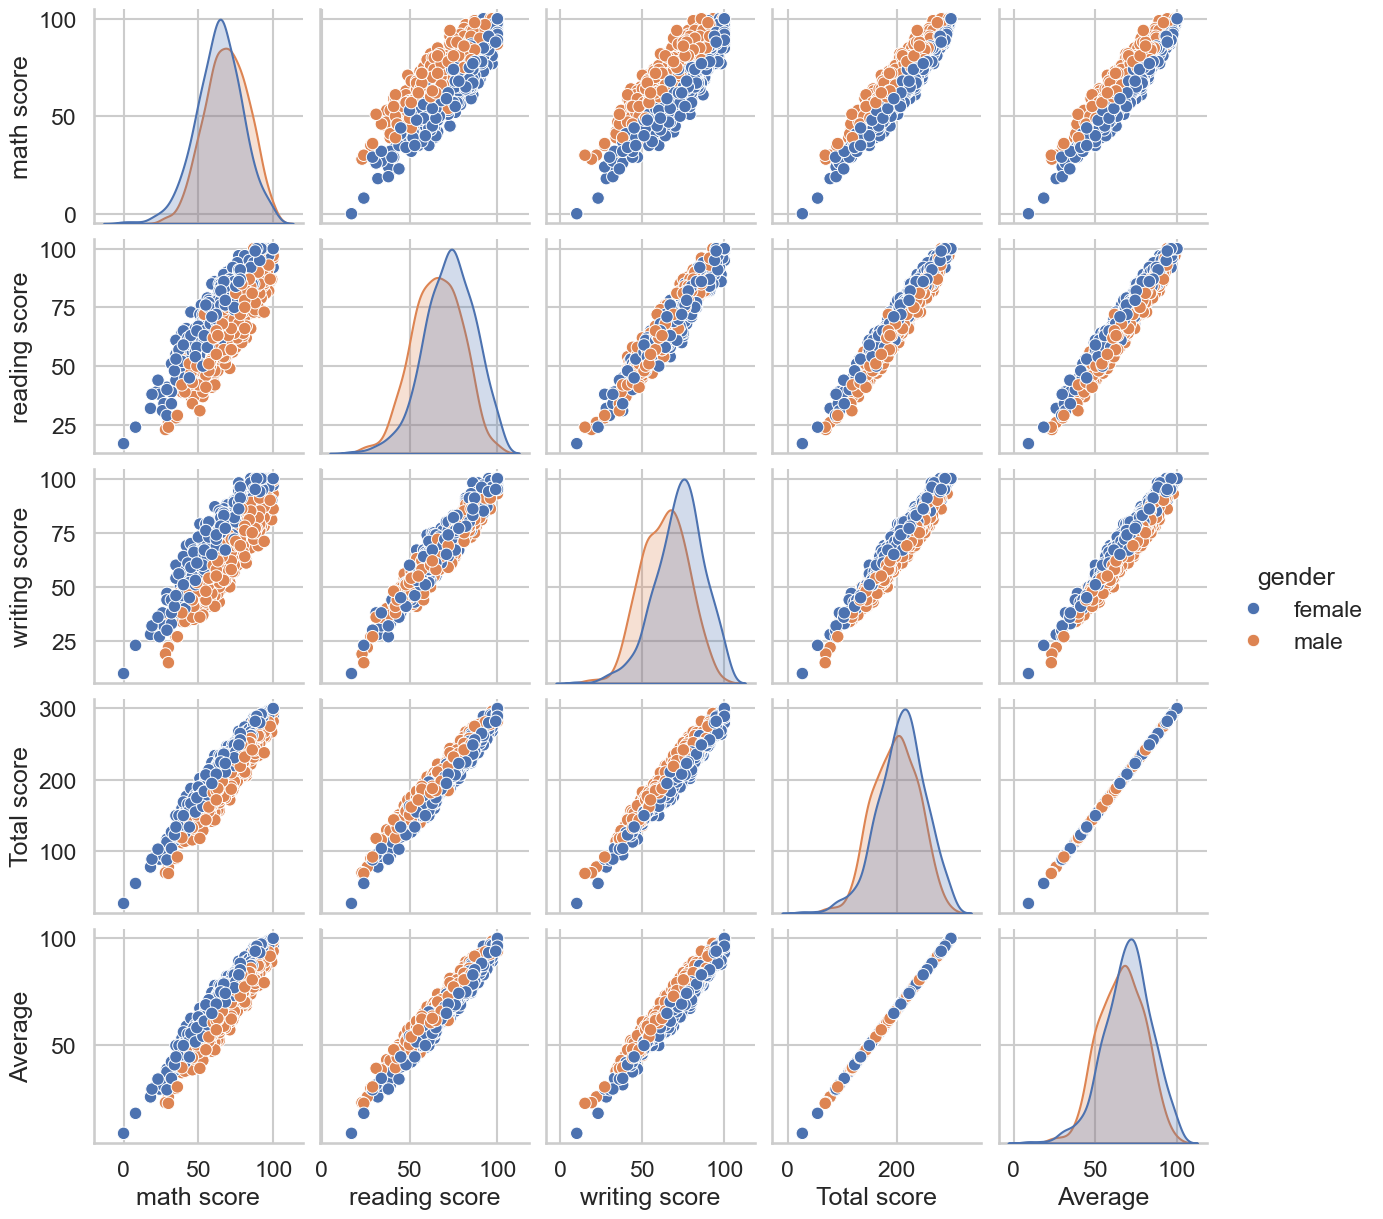

In [36]:
sns.pairplot(df,hue = 'gender')
plt.show()

__CONCLUSION__
* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.